In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
import time
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

521.7640106678009


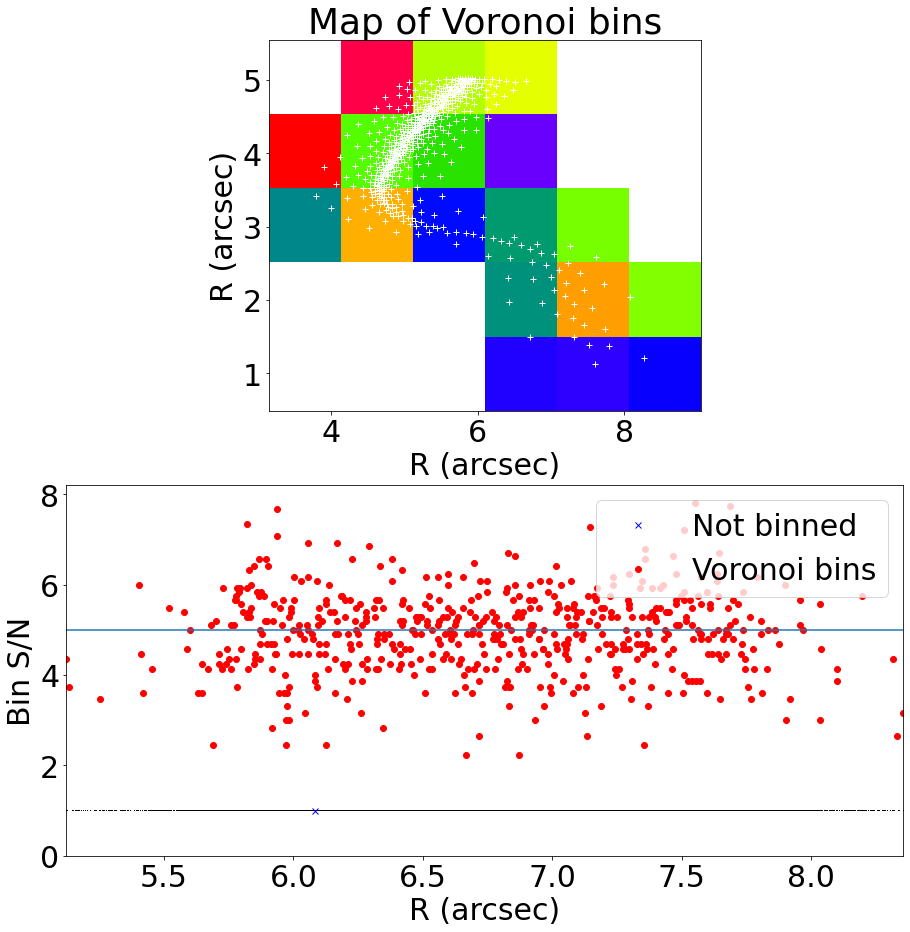

In [9]:
#code in one piece
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
dms = np.linspace(-0.10,0.10,21)
reds = np.linspace(0.0,0.05,11)
#ages = ['09000']
chi2 = []
for dm in dms:
#    for red in reds:
    dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 500000
    for i in range(n_div):
        bin_num = search_point_location_bc(dp['vi'].values[i*500000:(i+1)*500000]*12.5, dp['v'].values[i*500000:(i+1)*500000] + dm, xBar, yBar)
        for j in range(500000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc(dp['vi'].values[n_div*500000:]*12.5, dp['v'].values[n_div*500000:] + dm, xBar, yBar)
    for j in range(total_pt - n_div*500000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

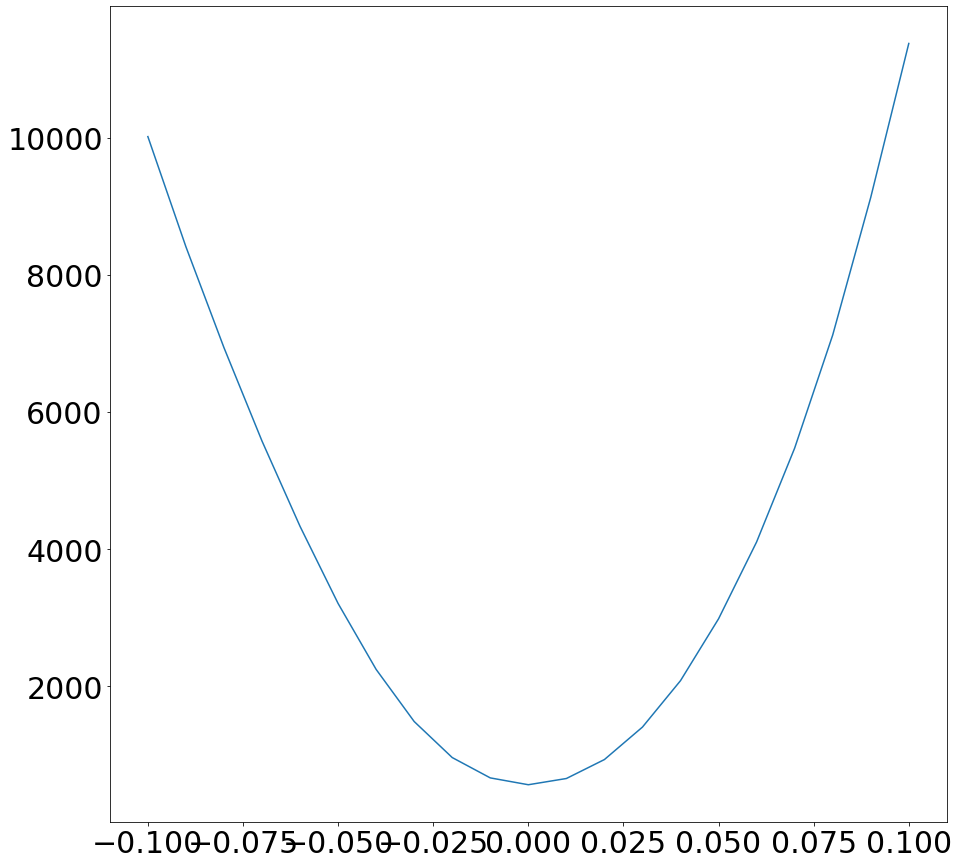

In [10]:
plt.plot(dms,chi2)

266.62579321861267


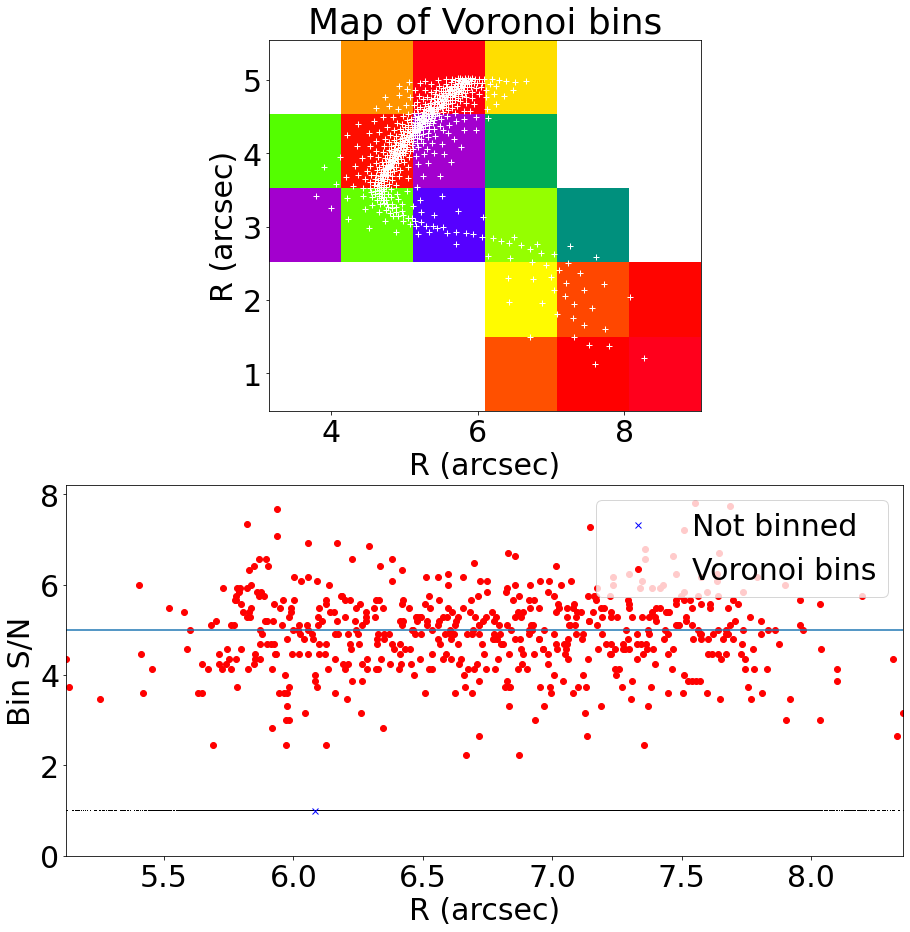

In [11]:
#code in one piece
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
dms = np.linspace(-0.10,0.10,21)
reds = np.linspace(0.0,0.05,11)
#ages = ['09000']
chi2 = []
for red in reds:
#    for red in reds:
    dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 500000
    for i in range(n_div):
        bin_num = search_point_location_bc((dp['vi'].values[i*500000:(i+1)*500000] + red)*12.5, dp['v'].values[i*500000:(i+1)*500000], xBar, yBar)
        for j in range(500000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc((dp['vi'].values[n_div*500000:] + red)*12.5, dp['v'].values[n_div*500000:], xBar, yBar)
    for j in range(total_pt - n_div*500000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

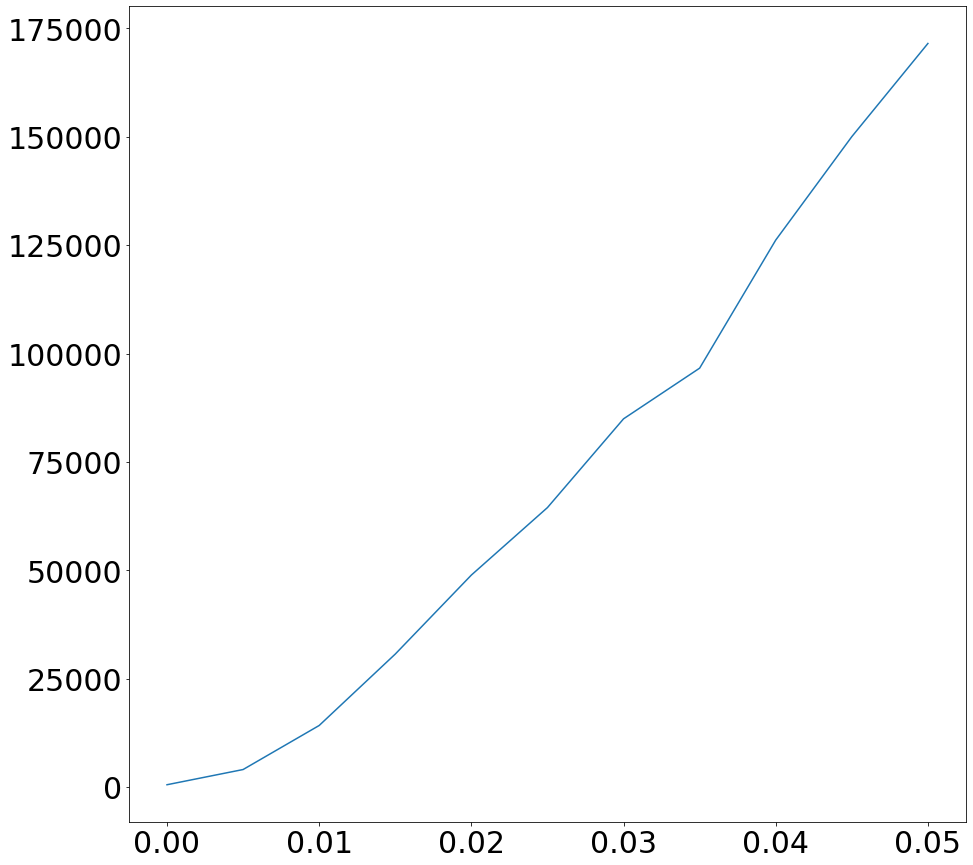

In [12]:
plt.plot(reds,chi2)

521.1201772689819


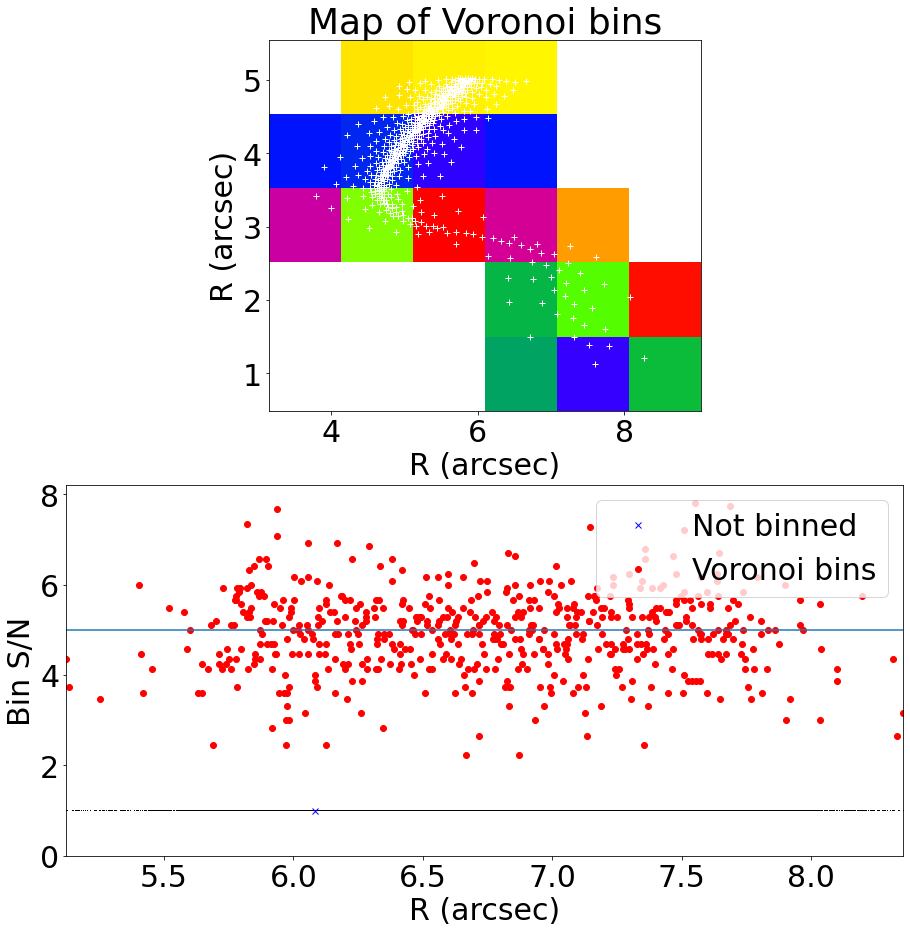

In [17]:
#code in one piece
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
#dms = np.linspace(-0.10,0.10,21)
#reds = np.linspace(0.0,0.05,11)
#ages = ['09000']
mcnum = np.linspace(10000,10020,21)
chi2 = []
for num in mcnum:
#    for red in reds:
    dp = pd.read_csv('mc{}.a11000'.format(str(int(num))),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 500000
    for i in range(n_div):
        bin_num = search_point_location_bc((dp['vi'].values[i*500000:(i+1)*500000])*12.5, dp['v'].values[i*500000:(i+1)*500000], xBar, yBar)
        for j in range(500000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc((dp['vi'].values[n_div*500000:])*12.5, dp['v'].values[n_div*500000:], xBar, yBar)
    for j in range(total_pt - n_div*500000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

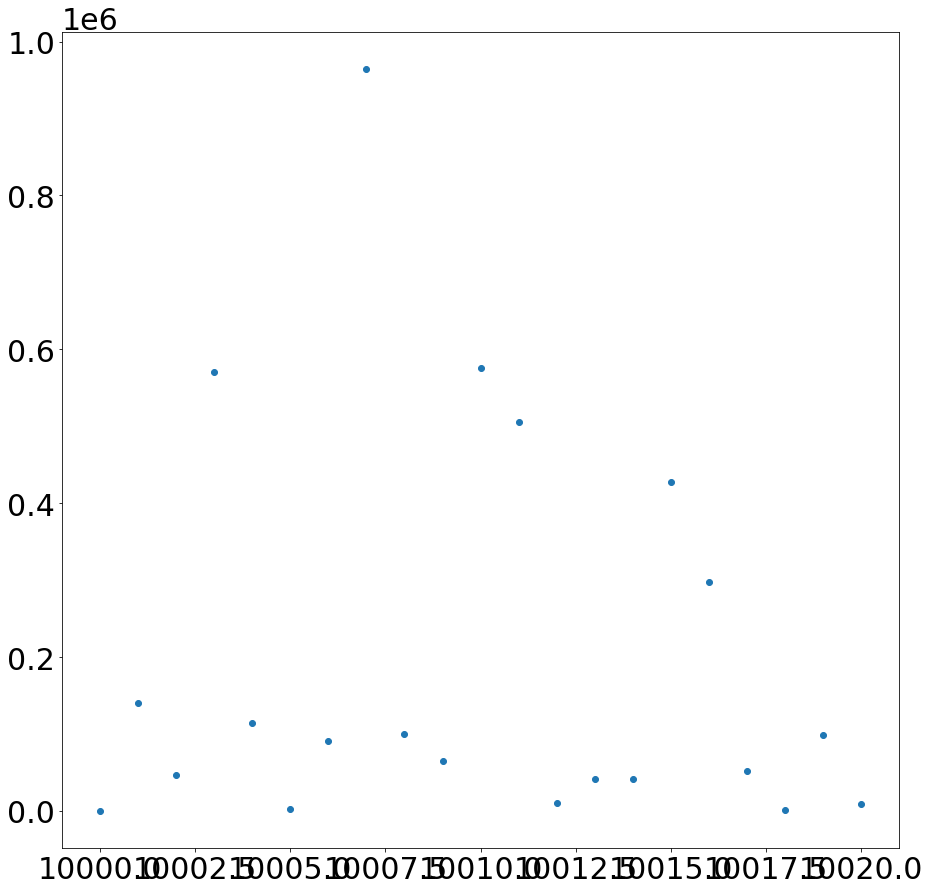

In [18]:
plt.scatter(mcnum,chi2)

In [19]:
chi2

[565.8614494987276,
 140241.6256168068,
 47448.874686364274,
 571242.4617821338,
 115108.81992686825,
 2731.909012184821,
 91149.05408057859,
 963760.8233793443,
 100383.13183650155,
 65265.9673166246,
 575713.9781122813,
 505865.26477675454,
 10021.32075071771,
 41177.86226644745,
 41560.92799839143,
 427531.7581043455,
 298412.683304557,
 52621.44832535862,
 1505.04411499653,
 99038.23130645868,
 8946.363508484657]

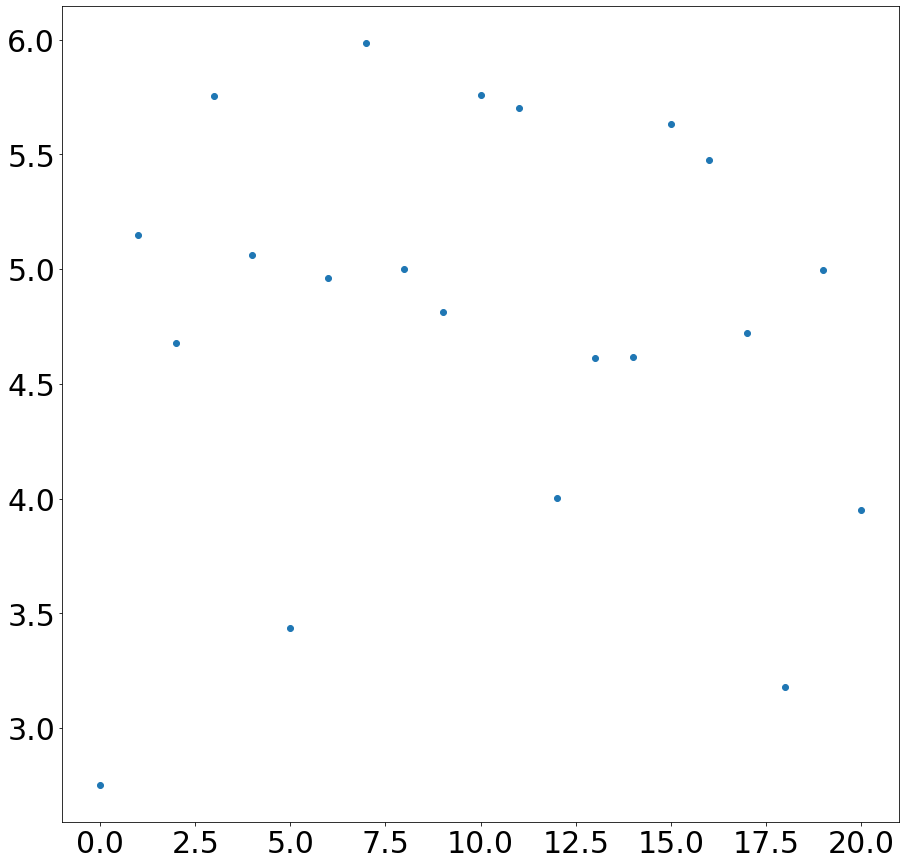

In [25]:
plt.scatter(mcnum-10000,np.log10(chi2));

1228.1200289726257


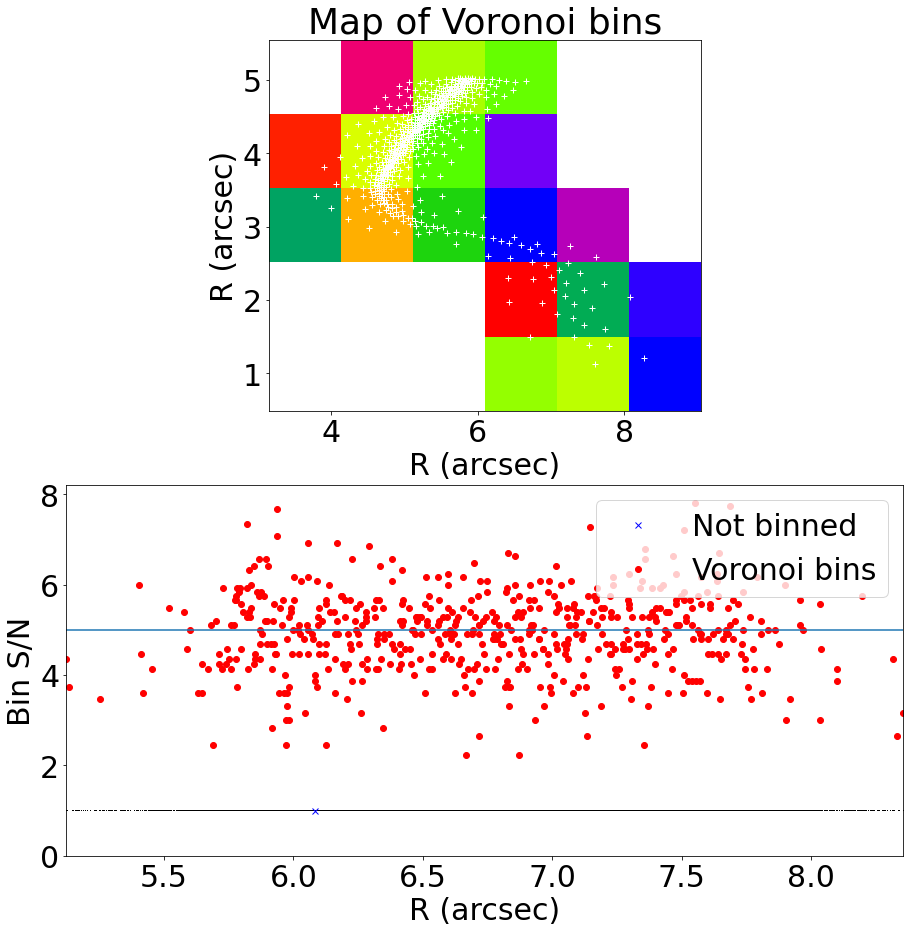

In [3]:
#code in one piece
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
dms = np.linspace(-0.10,0.10,11)
reds = np.linspace(0.0,0.05,6)
#ages = ['09000']
chi2 = []
for dm in dms:
    for red in reds:
        dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
        bin_count = np.zeros(len(xBar))
        total_pt = len(dp)
        n_div = total_pt // 500000
        for i in range(n_div):
            bin_num = search_point_location_bc((dp['vi'].values[i*500000:(i+1)*500000] + red)*12.5, dp['v'].values[i*500000:(i+1)*500000] + dm, xBar, yBar)
            for j in range(500000):
                bin_count[bin_num[j]] += 1
#do the last bit
        bin_num = search_point_location_bc((dp['vi'].values[n_div*500000:] + red)*12.5, dp['v'].values[n_div*500000:] + dm, xBar, yBar)
        for j in range(total_pt - n_div*500000):
            bin_count[bin_num[j]] += 1
        density = bin_count/total_pt
        chi2.append([dm, red, np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std)])
end = time.time()
print(end - start)

In [4]:
chi2

[[-0.1, 0.0, 10018.139581847034],
 [-0.1, 0.01, 32522.464878932096],
 [-0.1, 0.02, 63646.622698580824],
 [-0.1, 0.03, 98748.71260184463],
 [-0.1, 0.04, 152272.94435577118],
 [-0.1, 0.05, 240384.5698145203],
 [-0.08, 0.0, 6940.260672034646],
 [-0.08, 0.01, 27426.284659533692],
 [-0.08, 0.02, 59829.26745567014],
 [-0.08, 0.03, 95787.46549710495],
 [-0.08, 0.04, 146369.0514608538],
 [-0.08, 0.05, 222142.11091643746],
 [-0.060000000000000005, 0.0, 4333.637546612222],
 [-0.060000000000000005, 0.01, 23510.683074405493],
 [-0.060000000000000005, 0.02, 56517.79567987978],
 [-0.060000000000000005, 0.03, 93673.80158942763],
 [-0.060000000000000005, 0.04, 141504.79254943944],
 [-0.060000000000000005, 0.05, 205933.04893312557],
 [-0.04000000000000001, 0.0, 2247.6746924394483],
 [-0.04000000000000001, 0.01, 19899.262364154365],
 [-0.04000000000000001, 0.02, 53477.134739874746],
 [-0.04000000000000001, 0.03, 91430.76835748533],
 [-0.04000000000000001, 0.04, 136636.55497054188],
 [-0.0400000000000000